In [1]:
import numpy as np
from pandas import *
import matplotlib.pyplot as plt

In [2]:
dataset_train=read_csv('Google_Stock_Price_Train.csv')
dataset_train.shape

(1258, 6)

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set = dataset_train.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
print(type(training_set_scaled))
print(training_set.shape)

<class 'numpy.ndarray'>
(1258, 1)


In [6]:
x_train = []
y_train = []

In [7]:
for i in range(60,len(training_set_scaled)):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [8]:
print(x_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [9]:
x_train.shape[0]
x_train.shape[1]
x_train.shape

(1198, 60)

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [12]:
regressor = Sequential()

In [13]:
regressor.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1], 1)))

In [18]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [19]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


In [20]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [21]:
regressor.add(Dense(units = 1))

In [22]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [24]:
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0459
Epoch 2/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0058
Epoch 3/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0049
Epoch 4/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0049
Epoch 5/100
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0049
Epoch 6/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0047
Epoch 7/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0053
Epoch 10/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0039
Epoch 11/100
1198/1198 [==============================] - ETA: 0s - loss: 0.004 - 8s 7ms/step - loss: 0.0041
Epoch 12/100
1198/1198 [============

1198/1198 [==============================] - 10s 8ms/step - loss: 0.0015
Epoch 96/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0015
Epoch 97/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0013
Epoch 98/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0012
Epoch 99/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0013


In [25]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

<IPython.core.display.Javascript object>

In [26]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

<IPython.core.display.Javascript object>

In [27]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

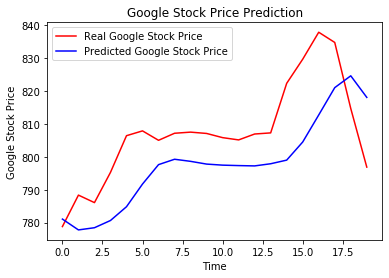

In [28]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
